# 94-775/95-865: PCA Demo
Author: George Chen (georgechen [at symbol] cmu.edu)

This demo is heavily based on Mark Richardson's 2009 "Principle Component Analysis" notes and uses data he pulled from DEFRA on 1997 UK food consumption (grams/person/week). This dataset is also used as a nice illustrated example of PCA here:
http://setosa.io/ev/principal-component-analysis/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots
import numpy as np

# grams per person per week
food_data = np.array([[105, 103, 103, 66],
                      [245, 227, 242, 267],
                      [685, 803, 750, 586],
                      [147, 160, 122, 93],
                      [193, 235, 184, 209], 
                      [156, 175, 147, 139],
                      [720, 874, 566, 1033],
                      [253, 265, 171, 143],
                      [488, 570, 418, 355],
                      [198, 203, 220, 187],
                      [360, 365, 337, 334],
                      [1102, 1137, 957, 674],
                      [1472, 1582, 1462, 1494],
                      [57, 73, 53, 47],
                      [1374, 1256, 1572, 1506],
                      [375, 475, 458, 135],
                      [54, 64, 62, 41]])
row_labels = ['Cheese',
              'Carcass meat',
              'Other meat',
              'Fish',
              'Fats and oils',
              'Sugars',
              'Fresh potatoes',
              'Fresh Veg',
              'Other Veg',
              'Processed potatoes',
              'Processed Veg',
              'Fresh fruit',
              'Cereals',
              'Beverages',
              'Soft drinks',
              'Alcoholic drinks',
              'Confectionary']
column_labels = ['England', 'Wales', 'Scotland', 'N Ireland']

first_column_width = 20
other_columns_width = 15

# print header
print("".ljust(first_column_width), end='')
for column_label in column_labels:
    print(column_label.rjust(other_columns_width), end='')
print()

# print each row in the numpy array with a column label
for row_label, row in zip(row_labels, food_data):
    print(row_label.ljust(first_column_width), end='')
    print("".join([("%d" % x).rjust(other_columns_width) for x in row]))

                            England          Wales       Scotland      N Ireland
Cheese                          105            103            103             66
Carcass meat                    245            227            242            267
Other meat                      685            803            750            586
Fish                            147            160            122             93
Fats and oils                   193            235            184            209
Sugars                          156            175            147            139
Fresh potatoes                  720            874            566           1033
Fresh Veg                       253            265            171            143
Other Veg                       488            570            418            355
Processed potatoes              198            203            220            187
Processed Veg                   360            365            337            334
Fresh fruit                 

In [2]:
food_data.T

array([[ 105,  245,  685,  147,  193,  156,  720,  253,  488,  198,  360,
        1102, 1472,   57, 1374,  375,   54],
       [ 103,  227,  803,  160,  235,  175,  874,  265,  570,  203,  365,
        1137, 1582,   73, 1256,  475,   64],
       [ 103,  242,  750,  122,  184,  147,  566,  171,  418,  220,  337,
         957, 1462,   53, 1572,  458,   62],
       [  66,  267,  586,   93,  209,  139, 1033,  143,  355,  187,  334,
         674, 1494,   47, 1506,  135,   41]])

([<matplotlib.axis.XTick at 0x11ef2d750>,
 <a list of 17 Text xticklabel objects>)

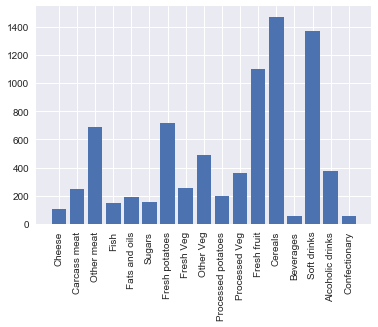

In [3]:
plt.bar(range(len(row_labels)), food_data[:, 0])
#plt.bar([1,2,3],[4,5,3])
plt.xticks(range(len(row_labels)), row_labels, rotation=90)

([<matplotlib.axis.XTick at 0x12000b1d0>,
 <a list of 17 Text xticklabel objects>)

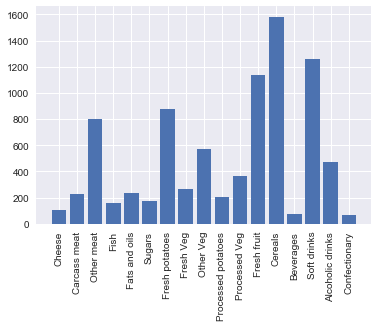

In [4]:
plt.bar(range(len(row_labels)), food_data[:, 1])
plt.xticks(range(len(row_labels)), row_labels, rotation=90)

In [5]:
from sklearn.decomposition import PCA

single_dimension_pca = PCA(n_components=2)  # project data down to a single dimension

#single_dimension_pca.fit(food_data.T)# then why do we need this step?

single_dimension_food_data = single_dimension_pca.fit_transform(food_data.T)#this deliver the low dimensional signal



In [6]:
single_dimension_food_data

array([[-144.99315218,   -2.53299944],
       [-240.52914764, -224.64692488],
       [ -91.869339  ,  286.08178613],
       [ 477.39163882,  -58.90186182]])

In [7]:
single_dimension_pca.explained_variance_ratio_

array([0.67444346, 0.29052475])

In [8]:
single_dimension_pca.components_#weight, to multiply by 17 values of each area to compute the final array
#Biger absolute weight is more important

array([[-0.05695538,  0.04792763, -0.25891666, -0.08441498, -0.00519362,
        -0.03762098,  0.40140206, -0.15184994, -0.24359373, -0.02688623,
        -0.03648827, -0.6326409 , -0.04770286, -0.02618776,  0.23224414,
        -0.46396817, -0.0296502 ],
       [ 0.01601285,  0.01391582, -0.01533114, -0.05075495, -0.09538866,
        -0.0430217 , -0.71501708, -0.14490027, -0.22545092,  0.04285076,
        -0.0454518 , -0.17774074, -0.21259968, -0.03056054,  0.55512431,
         0.11353652,  0.00594992]])

ValueError: x and y must be the same size

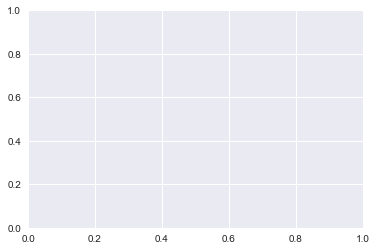

In [9]:
# matplotlib doesn't have a built-in 1D scatter plot but we can
# just use a 2D scatter plot with y-axis values all set to 0
y_axis_all_zeros = np.zeros(len(single_dimension_food_data))

plt.scatter(single_dimension_food_data, y_axis_all_zeros)
for idx in range(len(single_dimension_food_data)):
    #plt.annotate(column_labels[idx], (single_dimension_food_data[idx], y_axis_all_zeros[idx]), rotation=90)
    plt.annotate(column_labels[idx], (single_dimension_food_data[idx], 0), rotation=90)

For any data point in the original 17-dimensional space, we can see what the PCA single-dimensional representation is using the `transform` function. For example, in the next cell, we compute the 1D projections for both England and Wales. However, we could actually plug in data that we didn't fit the PCA model with (for example, if we collected the 17 measurements for Pennsylvania, we could use it with transform as well, etc).

How could this be realized?
The purpose is to get most variance, in this case, if there is only one point in multi dimension, how to get the PCA without knowing other points?

## Interpretation

How do we interpret the low-dimensional representation? Why is North Ireland so far away from the other points? One way to try to answer this question is to first look at what features (i.e., what specific food/drink items) are being assigned high weight by PCA:

In [ ]:
print(single_dimension_pca.components_[0])  # index 0 is for the 1st principal component (since Python starts counting at 0)

Importantly, how PCA (that has already been fitted) actually projects a data point to 1D is to take a weighted combination using the above weights (although it first subtracts off the feature means). Specifically, here are the calculations for England and Wales:

In [ ]:
np.inner(single_dimension_pca.components_[0],
         food_data[:, 0] - single_dimension_pca.mean_)

In [ ]:
food_data[:, 0] - single_dimension_pca.mean_

In [ ]:
np.inner(single_dimension_pca.components_[0],
         food_data[:, 1] - single_dimension_pca.mean_)

Weights with larger absolute value correspond to features that lead to the largest spread along the projected 1D axis.

Here's some code to rank the weights by largest absolute value to smallest absolute value:

In [ ]:
abs_val_of_1st_principal_component_weights = np.abs(single_dimension_pca.components_[0])

# in the previous lecture we saw the `sorted` function; now we introduce numpy's `argsort`,
# which does *not* return the sorted list but instead returns the rearranged indices that
# would sort the list (put another way, it returns rankings)
ranking_of_largest_to_smallest = np.argsort(-abs_val_of_1st_principal_component_weights)  # use negative to get largest to smallest

# now print out the food items having highest to lowest absolute value weight
for rank in ranking_of_largest_to_smallest:
    print(row_labels[rank], ':', single_dimension_pca.components_[0][rank])
    #print(rank, ':', single_dimension_pca.components_[0][rank])

At this point, we leave the following as an exercise to you: for a few of the food/drink items with the highest absolute value weight, compare the values between the different regions of the UK. Can you see why North Ireland is considered very different from the other regions?